## Импорт библиотек и загрузка данных 

Импортируем нужные библиотеки:

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Загрузим датасет:

In [60]:
data = pd.read_csv('penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:	
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всего их два:
  - 0: самка
  - 1: самец





И теперь реализуем свой класс линейной регрессии, который затем обучим на датасете.

## Реализация класса линейной регрессии

In [61]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.coef_ = None
        self.intercept_ = None
        
        
    def fit(self, X, y):
        '''
        функция обучения линейной регрессии. Аналог метода fit модели LinearRegression из sklearn.
        функция принимает на вход обучающую выборку 
        (Х — матрица признаков, y — массив ответов, значений целевой переменной),
        и подбирает коэффициенты линейной регрессии.
        
        входящие параметры: 
            X: матрица размера (n, f), где n — количество элементов датасета, 
               f — количество признаков
            y: массив размера (n, ), где n — количество элементов датасета
        '''
        # переведем X и y в формат numpy array, 
        # чтобы было проще работать
        X = np.array(X)
        y = np.array(y)
        
        
        ones = np.array([[1] * len(X)]).transpose()
        X_with_one = np.hstack((ones, X))
        self.all_coef = np.linalg.inv(X_with_one.transpose()@X_with_one)@X_with_one.transpose()@y
        # список коэффициентов, которые модель поставила 
        # в соответствие признакам датасета. 
        self.coef_ = self.all_coef[1:]
        # коэффициент — свободный член.
        self.intercept_ = self.all_coef[0]
        
    def predict(self, X):
        '''
        функция получения предсказания линейной регрессии по входящему массиву признаков Х.  
        
        входящие параметры: 
            X: матрица размера (n, f), где n — количество элементов датасета, 
               f — количество признаков
        '''
        
        y_pred = X @ self.coef_ + self.inter
        
        return y_pred

## Тестирование класса линейной регрессии

Давайте протестируем наш самописный класс MyLinearRegression, чтобы убедиться, что мы написали его верно.

### Датасет с одним признаком

Сначала протестируем случай, когда у нас всего один признак в данных. Будем пытаться предсказывать длину клюва пингвина по его длине плавника.

In [63]:
X = data[['длина плавника']]
y = data['длина клюва']

Разобьем Х и y на train и test:

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

И визуализируем точки обучающей выборки:

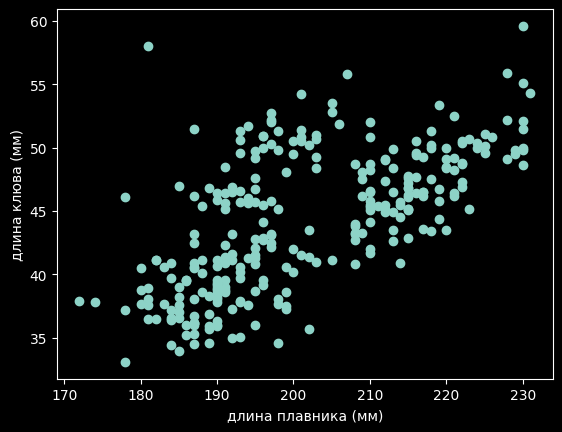

In [73]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

plt.show()

Отлично. Теперь объявим и обучим нашу линейную регрессию:

In [66]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)

И посмотрим, какие у нашей линейной регрессии получились коэффициенты:

In [67]:
my_lr.coef_, my_lr.intercept_

(array([0.24975152]), -6.066029429445172)

Теперь мы можем визуализировать прямую, которую описывает наша линейная регрессия.

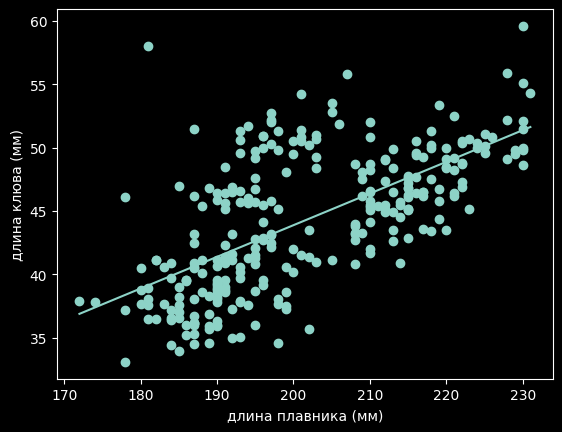

In [74]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = coef_*x_1 + intercept_
def f_line(x):
    return  my_lr.coef_*x + my_lr.intercept_
x = [np.min(X_train, axis=0), np.max(X_train, axis=0)]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('длина плавника (мм)')
plt.ylabel('длина клюва (мм)')

plt.show();

Хорошо, мы убедились, что наша линейная регрессия как-то работает: выучивает какие-то коэффициенты. Давайте теперь убедимся, что она работает **правильно**. Для этого импортируем линейную регрессию из sklearn, обучим ее на тех же данных и получим ее коэффициенты. Они должны совпадать с теми, что выучивает наша самописная линейная регрессия.

In [46]:
from sklearn.linear_model import LinearRegression

Объявляем модель, обучаем и получаем коэффициенты:

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.2617349]), -8.51176289358476)

Проверим совпадение коэффицентов обеих моделей.


In [49]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

In [50]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

Ячейка отработала без ошибок. Наша линейная регрессия полностью правильно работает на датасете, в котором один признак!
    
Теперь давайте проверим, что самописная модель также работает на данных, в которых несколько признаков.

### Датасет с несколькими признаками

In [51]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Обучим нашу модель на данных, в которых будут все 6 признаков (все, кроме "длина клюва", которая у нас целевая переменная).

In [52]:
y = data['длина клюва']
X = data.drop(columns=['длина клюва'])

Поделим данные на train и test:

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Объявим и обучим самописную линейную регрессию на train части:

In [54]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_

(array([ 7.58364928e+00,  5.06307990e-01,  1.38103410e+00,  1.79110781e-02,
        -1.18527188e-03,  2.31197788e+00]),
 13.174117380327505)

Также объявим и обучим модель из sklearn, чтобы сравнить их:

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([ 7.58364928e+00,  5.06307990e-01,  1.38103410e+00,  1.79110781e-02,
        -1.18527188e-03,  2.31197788e+00]),
 13.174117380357103)

Проверка, что coef_ и intercept_ совпадают:

In [56]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

И также проверим, что правильно работает метод predict:

In [57]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

Итак, все ячейки до этого момента отработали без ошибок: кажется, наша линейная регрессия полностью правильно работает.